# STEP 1

## Reasearch Question

### A: Design a research question
"What causes x?"

Selecting target variables -- Dependant -- (Y)

Task 1: any logical continuous variable

Task 2: any logical categorical variable

### B: Select explanatory variables
include a good number (10-15) explanatory variables to ensure I find independant variables that do influence the dependant variable. 


In [33]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#sstyling and options

pd.options.display.max_columns = None
pd.options.display.max_rows = None

plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [35]:
#reading the csv
df = pd.read_csv('churn_clean.csv')

In [41]:
#getting a quick look
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# STEP 2

## Data Cleaning

### Check for NA

In [49]:
#checking for na values.
na_count = df.isna().sum()
print(na_count[na_count > 0])

InternetService    2129
dtype: int64


### Check for Duplicates

In [ ]:
#checking for duplicates
dup_count = df.duplicated().sum().any()
print(dup_count)

In [46]:
df.duplicated().any()

False

### Check for Outliers

array([[<Axes: title={'center': 'CaseOrder'}>,
        <Axes: title={'center': 'Zip'}>, <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Lng'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>,
        <Axes: title={'center': 'Email'}>],
       [<Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>],
       [<Axes: title={'center': 'Item1'}>,
        <Axes: title={'center': 'Item2'}>,
        <Axes: title={'center': 'Item3'}>,
        <Axes: title={'center': 'Item4'}>,
        <Axes: title={'center': 'Item5'}>],
       [<Axes: title={'center': 'Item6'}>,
        <Axes: title={'center': 'Item7'}>,
 

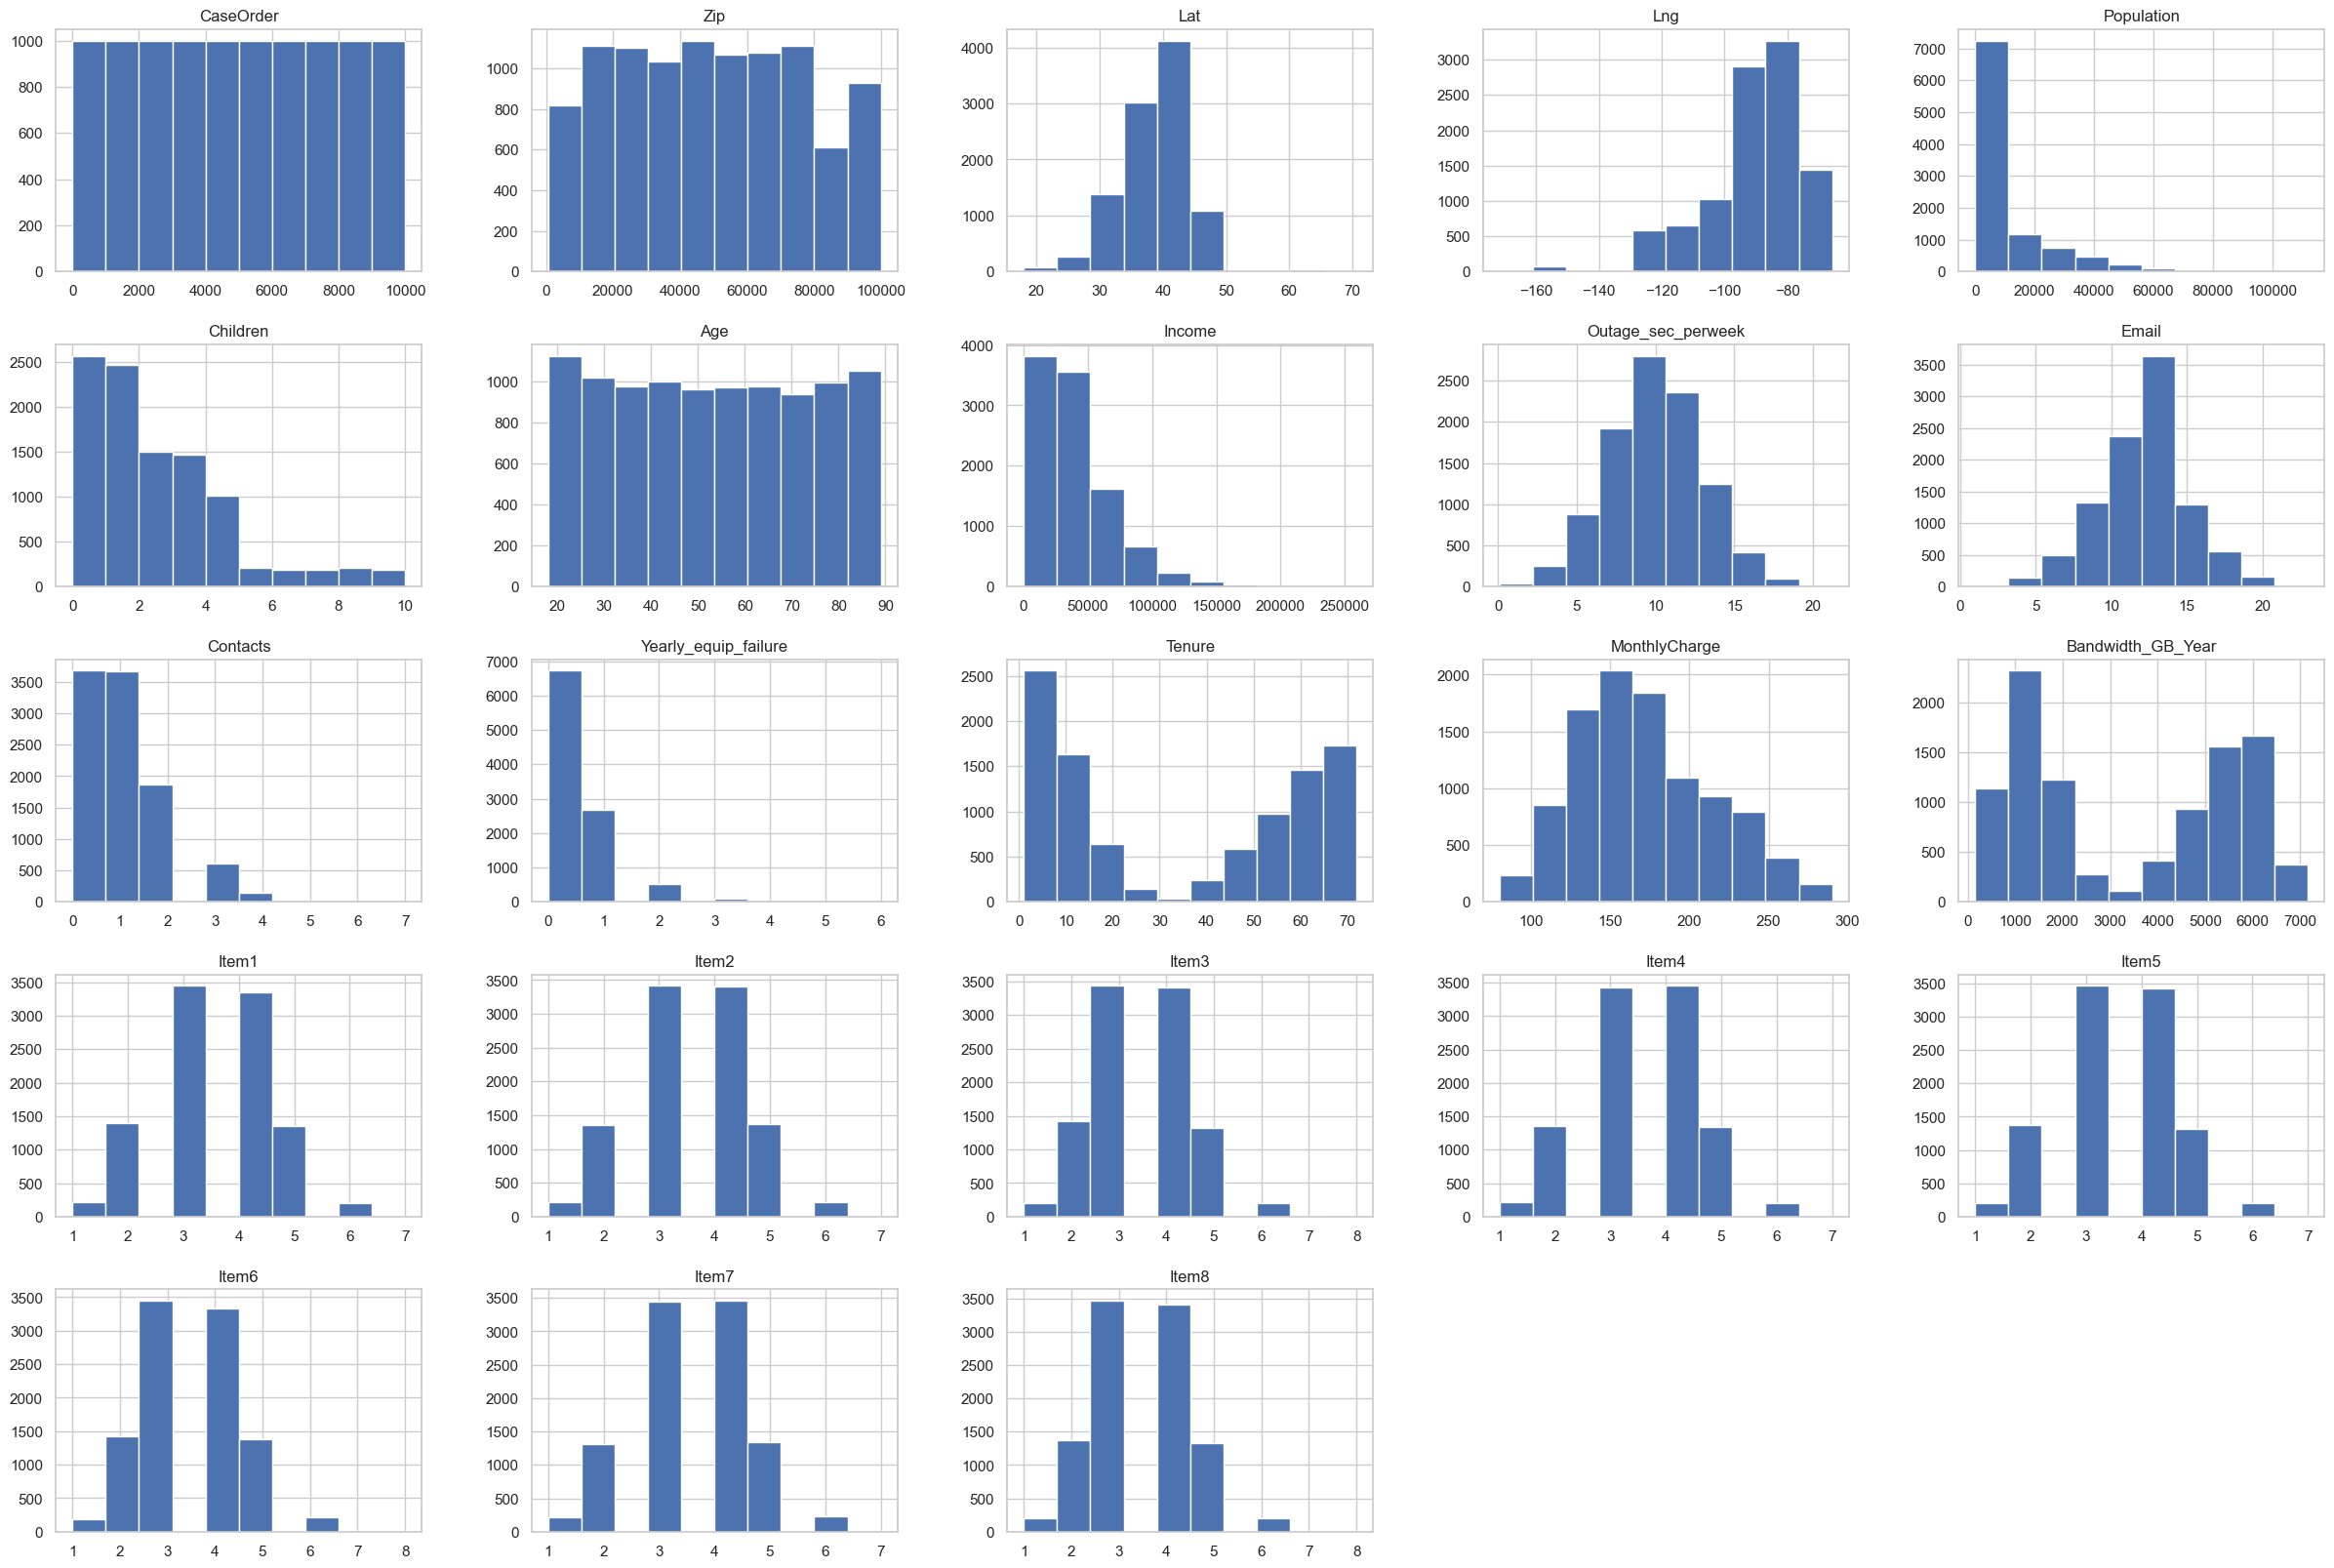

In [48]:
df.hist(figsize=(30,20))

### Data Exploration

Descriptive Statistics (Mean, Median, Mode)


Univatiate analysis (visualization) - every explanatory (aka: prdicting, x variable)  variable needs a visual

Bivariate analysis (visualization) (aka: predicting variable charted against target variable)  - every explanatory variables needs a visual

### Data Wrangling

Re-expression of categorical variables

Logarithmic transofrmations (not required; optional)

categorical data needs to be encoded as numbers to perform statistical modeling

two types of categorical data:

    ordinal -> inherent order
        ex: grades (a+, a, a-, b etc.) likert scales (very satisfied, somewhat satisfied, etc), age (child teen adult)
   method: ordinal encoding technique
python: replace function
R: revalue/replace function


   nominal -> names only; no inherent order
        ex: Gender, marital status, 
Method: One hot encoding

**Do not use one hot encoding with vairables that have a large number of values**
A new column will be created for each variable called a dummy variable. The values in this column are binary 0 and 1 to indicate if this row belongs to the category

To mitigate multicolinearity use k-1 (number of columns - 1) when adding the variables (columns) to the regression model

# STEP 3

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970